In [16]:
# first neural network with keras tutorial
# from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    InputLayer,
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Rescaling,
)
import numpy as np
import json
import pickle
import sys
import pandas as pd
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

#from utils import *

random_seed = 42
random.seed(random_seed)

dim1 = 176
dim2 = 208
num_classes = 4
batch_size = 32

In [5]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


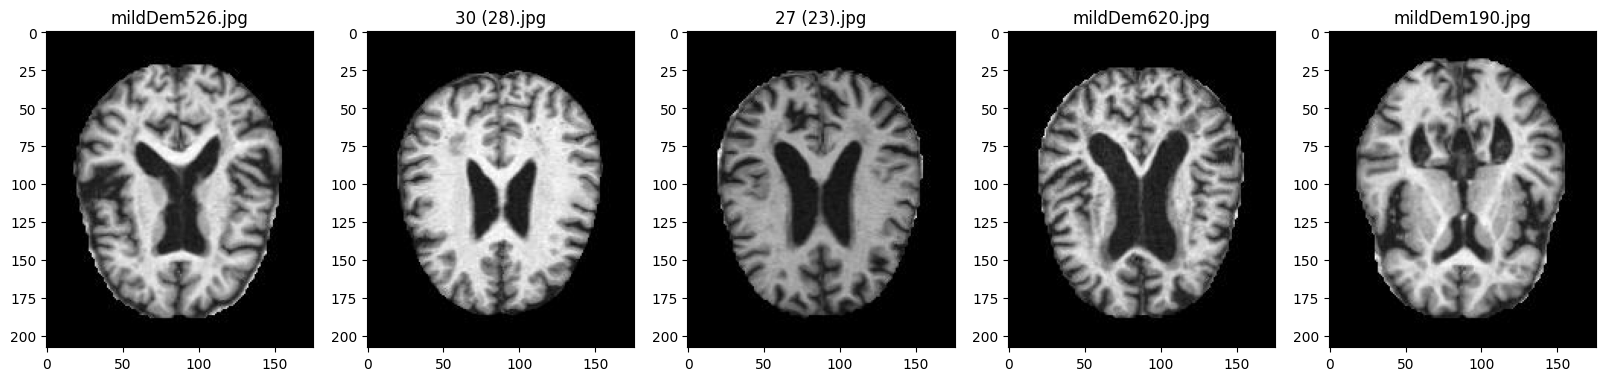

In [6]:
plt.figure(figsize=(20, 20))
test_folder = "/mnt/g/Unibo/magistrale/Alzheimer_s Dataset Classes/MildDemented"
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path = os.path.join(test_folder, file)
    img = cv2.imread(image_path, 0)
    # img = mpimg.imread(image_path)
    ax = plt.subplot(1, 5, i + 1)
    ax.title.set_text(file)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    # plt.imshow(img)

In [7]:
with np.printoptions(threshold=np.inf):
    print(img.shape)

(208, 176)


In [8]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    limit = 1000
   
    for dir1 in os.listdir(img_folder):
        for idx, file in enumerate(os.listdir(os.path.join(img_folder, dir1))):
            image_path= os.path.join(img_folder, dir1,  file)
            image = cv2.imread(image_path, 0)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 # normalization
            img_data_array.append(image)
            class_name.append(dir1)
            
            if idx == limit:
                break
    return img_data_array, class_name

# extract the image array and class name
img_data, class_name = create_dataset('/mnt/g/Unibo/magistrale/Alzheimer_s Dataset Classes/')

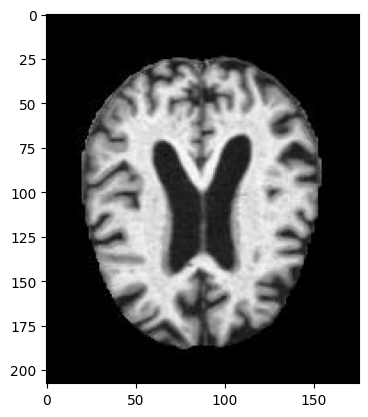

In [9]:
plt.imshow(img_data[0], cmap='gray', vmin=0, vmax=1)
plt.show()

In [10]:
# target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
target_dict = {
    'NonDemented': 0,
    'VeryMildDemented': 1,
    'MildDemented': 2,
    'ModerateDemented': 3}
target_dict

{'NonDemented': 0,
 'VeryMildDemented': 1,
 'MildDemented': 2,
 'ModerateDemented': 3}

In [11]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]
len(target_val)

2962

In [12]:
print(type(img_data))
print(len(img_data))
X = np.array(img_data, np.float32)
y = np.array(list(map(int,target_val)), np.float32)
print(type(X))

<class 'list'>
2962
<class 'numpy.ndarray'>


In [13]:
hospitals = {
    "Alpha": 0.5,
    "Beta": 0.3,
    "Gamma": 0.2
}

rows = len(X)
n_alpha = int(rows * hospitals['Alpha'])
n_beta = int(rows * hospitals['Beta'])
n_gamma = int(rows * hospitals['Gamma'])

values_list =   ['Alpha'] * n_alpha +\
                ['Beta'] * n_beta +\
                ['Gamma'] * n_gamma

print(type(X))
print(type(X[0]))
print(X.shape)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

print(type(X))
print(type(X[0]))
print(X.shape)

df = pd.DataFrame({"X": list(X), "y": list(y)})
print(values_list)
if df.shape[0] != len(values_list):
    values_list.append("Gamma")
    print(values_list)
df['hospital'] = values_list
# df['hospital'] = df['hospital'].map(hospitals)

df

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2962, 208, 176)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2962, 208, 176)
['Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alpha', 'Alph

,X,y,hospital
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,Alpha
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.0,Alpha
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.0,Alpha
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.0,Alpha
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,Alpha
...,...,...,...
2957,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.0,Gamma
2958,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.0,Gamma
2959,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,Gamma
2960,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,Gamma


In [19]:
initializer = tf.keras.initializers.GlorotUniform(seed=random_seed)

def get_model(input_shape):
    x = Input(shape=input_shape)

    # r = Rescaling(1./255)(x)
    # c1 = Conv2D(16, 3, padding='same', activation='relu')(r)
    
    c1 = Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer)(x)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer)(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(64, 3, padding='same', activation='relu', kernel_initializer=initializer)(p2)
    p3 = MaxPooling2D((2, 2))(c3)

    f = Flatten()(p3)
    d1 = Dense(128, activation='relu', kernel_initializer=initializer)(f)
    d2 = Dense(num_classes, activation='softmax', kernel_initializer=initializer)(d1)

    model = Model(x, d2)

    # model.summary()
    
    return model

model = get_model((dim2, dim1, 1))

In [23]:
from tensorflow.keras.optimizers import Adam
test_val_split = 0.30
weights = {}
evaluation = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_val_split, random_state=random_seed)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=random_seed)


for hospital in hospitals.keys():
    print(hospital)

    X_h = df[df["hospital"] == hospital]["X"].to_numpy()
    y_h = df[df["hospital"] == hospital]["y"].to_numpy()
    
    X_h = np.stack(X_h, axis = 0)
    y_h = np.stack(y_h, axis = 0)

    X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=test_val_split, random_state=random_seed)
    X_test_h, X_val_h, y_test_h, y_val_h = train_test_split(X_test_h, y_test_h, test_size=0.5, random_state=random_seed)

    print(len(X_train_h))
    print(len(X_val_h))
    print(len(X_test_h))
    
    model = get_model((dim2, dim1, 1))
    model.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    model.fit(X_train_h, y_train_h, validation_data = (X_val_h, y_val_h), epochs=10)
    weights[hospital] = model.get_weights()
    
    evaluation[hospital] = model.evaluate(X_test_h, y_test_h)
    
    """
    w_listed = [param.tolist() for param in w]
    w_listed
    w_JSON = json.dumps(w_listed)
    """

Alpha
1036
223
222
Epoch 1/10
33/33 [==============================] - 3s 39ms/step - loss: 1.1827 - accuracy: 0.3880 - val_loss: 1.0614 - val_accuracy: 0.4978
Epoch 2/10
33/33 [==============================] - 1s 26ms/step - loss: 0.9644 - accuracy: 0.5695 - val_loss: 0.8917 - val_accuracy: 0.6099
Epoch 3/10
33/33 [==============================] - 1s 26ms/step - loss: 0.7911 - accuracy: 0.6689 - val_loss: 0.7263 - val_accuracy: 0.6682
Epoch 4/10
33/33 [==============================] - 1s 27ms/step - loss: 0.6710 - accuracy: 0.7259 - val_loss: 0.6840 - val_accuracy: 0.6726
Epoch 5/10
33/33 [==============================] - 1s 26ms/step - loss: 0.4645 - accuracy: 0.8147 - val_loss: 0.6611 - val_accuracy: 0.7399
Epoch 6/10
33/33 [==============================] - 1s 26ms/step - loss: 0.3039 - accuracy: 0.9006 - val_loss: 0.4754 - val_accuracy: 0.8206
Epoch 7/10
33/33 [==============================] - 1s 26ms/step - loss: 0.2000 - accuracy: 0.9353 - val_loss: 0.4464 - val_accuracy: 0

In [25]:
avg_weights = []
for i in range(len(weights["Alpha"])):
    layer_weights = []
    for j in range(len(weights["Alpha"][i])):
        layer_weights.append((weights["Alpha"][i][j] + weights["Beta"][i][j] + weights["Gamma"][i][j]) / 3.0)
    avg_weights.append(layer_weights)

for i in range(len(avg_weights)):
    avg_weights[i] = np.array(avg_weights[i])  # Convert the list to a NumPy array
    # avg_weights[i] = np.reshape(arr, weights["Alpha"][i].shape)  # Reshape the array to the desired shape
    print(type(avg_weights[i]))
    # print(len(avg_weights[i]))
    print(avg_weights[i].shape)

<class 'numpy.ndarray'>
(3, 3, 1, 16)
<class 'numpy.ndarray'>
(16,)
<class 'numpy.ndarray'>
(3, 3, 16, 32)
<class 'numpy.ndarray'>
(32,)
<class 'numpy.ndarray'>
(3, 3, 32, 64)
<class 'numpy.ndarray'>
(64,)
<class 'numpy.ndarray'>
(36608, 128)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>
(128, 4)
<class 'numpy.ndarray'>
(4,)


In [58]:
print(type(avg_weights[0]))
print(len(avg_weights[0]))
# print(avg_weights[0].shape)

arr = np.array(avg_weights[2])
print(type(arr))
print(arr.shape)

arr = np.reshape(arr, weights["Alpha"][2].shape)

print(type(arr))
print(arr.shape)

<class 'list'>
3
<class 'numpy.ndarray'>
(3, 3, 16, 32)
<class 'numpy.ndarray'>
(3, 3, 16, 32)


In [64]:
print(type(weights["Alpha"]))
print(len(weights["Alpha"]))
print(type(weights["Alpha"][0]))
print(weights["Alpha"][0].shape)
print(weights["Alpha"][0])
print("--------------------------------------------------------")
print(type(avg_weights))
print(len(avg_weights))
print(type(avg_weights[0]))
# print(len(avg_weights[0]))
print(avg_weights[0].shape)
print(avg_weights[0])

<class 'list'>
10
<class 'numpy.ndarray'>
(3, 3, 1, 16)
[[[[ 0.06146469  0.03555027  0.1281778  -0.02021028  0.01350098
     0.23433208 -0.17918709  0.05177861  0.12327244  0.14100152
     0.15691243  0.1049132   0.11592235  0.17696327  0.169568
    -0.11329735]]

  [[ 0.21316846 -0.12565184  0.21276532 -0.07620858  0.0604207
     0.04441065 -0.19548965 -0.12472136 -0.11109968 -0.00198497
     0.1714701  -0.03301549 -0.03123606  0.17478673  0.06050859
     0.12692998]]

  [[ 0.11048183 -0.00534126 -0.04463503  0.15708825 -0.01260913
    -0.00228128 -0.21578884  0.1625951  -0.17517976  0.01060363
     0.03280881  0.08852522  0.04590134 -0.00613636  0.0739109
    -0.04710311]]]


 [[[ 0.17266828 -0.14503346  0.07321436  0.16313174  0.12588464
     0.04943213  0.12189342  0.06916015 -0.01748019 -0.18279895
     0.22324306  0.10509434 -0.00192303 -0.13545029  0.10806306
    -0.13632593]]

  [[-0.06622403  0.12932347  0.14506306 -0.13735113 -0.1652549
    -0.08141028 -0.15263212  0.00599812

In [14]:
print(evaluation)

{'Alpha': [0.6425114274024963, 0.7882882952690125], 'Beta': [0.627390444278717, 0.8270676732063293], 'Gamma': [1.1427241563796997, 0.6741573214530945]}


In [27]:
model_avg = tf.keras.models.clone_model(model)
# model_avg = get_model((dim2, dim1, 1))
model_avg.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_avg.set_weights(avg_weights)

model_avg.evaluate(X_test, y_test)

14/14 [==============================] - 1s 34ms/step - loss: 0.1010 - accuracy: 0.9685


[0.10100150108337402, 0.9684684872627258]

In [ ]:
for n in range(10):
    # learning on hospital
    for hospital in hospitals.keys():
        print(hospital)

        X_h = df[df["hospital"] == hospital]["X"].to_numpy()
        y_h = df[df["hospital"] == hospital]["y"].to_numpy()

        X_h = np.stack(X_h, axis = 0)
        y_h = np.stack(y_h, axis = 0)

        X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=test_val_split, random_state=random_seed)
        X_test_h, X_val_h, y_test_h, y_val_h = train_test_split(X_test_h, y_test_h, test_size=0.5, random_state=random_seed)

        model = get_model((dim2, dim1, 1))
        model.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        model.set_weights(avg_weights)
        model.fit(X_train_h, y_train_h, validation_data = (X_val_h, y_val_h), epochs=10)
        weights[hospital] = model.get_weights()

        print("Aggregation Evaluation {}: {}".format(hospital, model.evaluate(X_test_h, y_test_h)))
    
    # aggregation
    avg_weights = []
    for i in range(len(weights["Alpha"])):
        layer_weights = []
        for j in range(len(weights["Alpha"][i])):
            layer_weights.append((weights["Alpha"][i][j] + weights["Beta"][i][j] + weights["Gamma"][i][j]) / 3.0)
        avg_weights.append(layer_weights)

    for i in range(len(avg_weights)):
        avg_weights[i] = np.array(avg_weights[i])  # Convert the list to a NumPy array
    
    # evaluation
    model_avg.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    model_avg.set_weights(avg_weights)
    print("AGGREGATION EVALUATION {}: {}".format(n, model_avg.evaluate(X_test, y_test)))
    print("-----------------------------------------------------------------------------------------------")
    
    

Alpha
Epoch 1/10
33/33 [==============================] - 3s 39ms/step - loss: 0.7607 - accuracy: 0.7693 - val_loss: 0.4558 - val_accuracy: 0.8296
Epoch 2/10
33/33 [==============================] - 1s 26ms/step - loss: 0.1899 - accuracy: 0.9527 - val_loss: 0.2496 - val_accuracy: 0.9238
Epoch 3/10
33/33 [==============================] - 1s 26ms/step - loss: 0.0536 - accuracy: 0.9932 - val_loss: 0.2222 - val_accuracy: 0.9238
Epoch 4/10
33/33 [==============================] - 1s 26ms/step - loss: 0.0206 - accuracy: 0.9990 - val_loss: 0.2306 - val_accuracy: 0.9327
Epoch 5/10
33/33 [==============================] - 1s 26ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9417
Epoch 6/10
33/33 [==============================] - 1s 26ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2289 - val_accuracy: 0.9372
Epoch 7/10
33/33 [==============================] - 1s 27ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2326 - val_accuracy: 0.9417
Epoch 8

13/13 [==============================] - 2s 50ms/step - loss: 0.5185 - accuracy: 0.8265 - val_loss: 0.5572 - val_accuracy: 0.7753
Epoch 2/10
13/13 [==============================] - 0s 29ms/step - loss: 0.1912 - accuracy: 0.9398 - val_loss: 0.2464 - val_accuracy: 0.8989
Epoch 3/10
13/13 [==============================] - 0s 30ms/step - loss: 0.0648 - accuracy: 0.9904 - val_loss: 0.2352 - val_accuracy: 0.8989
Epoch 4/10
13/13 [==============================] - 0s 29ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.3550 - val_accuracy: 0.8989
Epoch 5/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.3082 - val_accuracy: 0.9101
Epoch 6/10
13/13 [==============================] - 0s 29ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2894 - val_accuracy: 0.9101
Epoch 7/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3477 - val_accuracy: 0.9101
Epoch 8/10
13/13 [======

7/7 [==============================] - 0s 11ms/step - loss: 0.3099 - accuracy: 0.9234
Aggregation Evaluation Alpha: [0.30992889404296875, 0.9234234094619751]
Beta
Epoch 1/10
20/20 [==============================] - 3s 41ms/step - loss: 0.2598 - accuracy: 0.9340 - val_loss: 0.4865 - val_accuracy: 0.8507
Epoch 2/10
20/20 [==============================] - 1s 27ms/step - loss: 0.0411 - accuracy: 0.9903 - val_loss: 0.2581 - val_accuracy: 0.9254
Epoch 3/10
20/20 [==============================] - 1s 27ms/step - loss: 0.0202 - accuracy: 0.9952 - val_loss: 0.3602 - val_accuracy: 0.8806
Epoch 4/10
20/20 [==============================] - 1s 28ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3025 - val_accuracy: 0.9030
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2327 - val_accuracy: 0.9403
Epoch 6/10
20/20 [==============================] - 1s 28ms/step - loss: 9.6790e-04 - accuracy: 1.0000 - val_loss: 0.2821 - val_accu

Epoch 10/10
3/3 [==============================] - 0s 9ms/step - loss: 0.1585 - accuracy: 0.9326
Aggregation Evaluation Gamma: [0.15846121311187744, 0.932584285736084]
14/14 [==============================] - 0s 9ms/step - loss: 0.0338 - accuracy: 0.9887
AGGREGATION EVALUATION 4: [0.03381025418639183, 0.9887387156486511]
-----------------------------------------------------------------------------------------------
Alpha
Epoch 1/10
33/33 [==============================] - 3s 36ms/step - loss: 0.0508 - accuracy: 0.9797 - val_loss: 0.3343 - val_accuracy: 0.8879
Epoch 2/10
33/33 [==============================] - 1s 27ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.2579 - val_accuracy: 0.9372
Epoch 3/10
33/33 [==============================] - 1s 27ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.2709 - val_accuracy: 0.9462
Epoch 4/10
33/33 [==============================] - 1s 27ms/step - loss: 6.2017e-04 - accuracy: 1.0000 - val_loss: 0.2348 - val_accuracy: 0.9596
Epoch 5

Epoch 8/10
20/20 [==============================] - 1s 28ms/step - loss: 1.0135e-04 - accuracy: 1.0000 - val_loss: 0.2524 - val_accuracy: 0.9552
Epoch 9/10
20/20 [==============================] - 1s 28ms/step - loss: 8.7014e-05 - accuracy: 1.0000 - val_loss: 0.2576 - val_accuracy: 0.9552
Epoch 10/10
5/5 [==============================] - 0s 9ms/step - loss: 0.1851 - accuracy: 0.9398
Aggregation Evaluation Beta: [0.18505911529064178, 0.9398496150970459]
Gamma
Epoch 1/10
13/13 [==============================] - 2s 53ms/step - loss: 0.0055 - accuracy: 0.9976 - val_loss: 0.3447 - val_accuracy: 0.8876
Epoch 2/10
13/13 [==============================] - 0s 29ms/step - loss: 0.0742 - accuracy: 0.9783 - val_loss: 0.3646 - val_accuracy: 0.9213
Epoch 3/10
13/13 [==============================] - 0s 31ms/step - loss: 0.0252 - accuracy: 0.9952 - val_loss: 0.2514 - val_accuracy: 0.9438
Epoch 4/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.

Epoch 6/10
33/33 [==============================] - 1s 27ms/step - loss: 8.3151e-05 - accuracy: 1.0000 - val_loss: 0.2195 - val_accuracy: 0.9641
Epoch 7/10
33/33 [==============================] - 1s 28ms/step - loss: 6.7231e-05 - accuracy: 1.0000 - val_loss: 0.2222 - val_accuracy: 0.9641
Epoch 8/10
33/33 [==============================] - 1s 29ms/step - loss: 5.5981e-05 - accuracy: 1.0000 - val_loss: 0.2276 - val_accuracy: 0.9641
Epoch 9/10
33/33 [==============================] - 1s 28ms/step - loss: 4.7435e-05 - accuracy: 1.0000 - val_loss: 0.2311 - val_accuracy: 0.9641
Epoch 10/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2780 - accuracy: 0.9459
Aggregation Evaluation Alpha: [0.27797770500183105, 0.9459459185600281]
Beta
Epoch 1/10
20/20 [==============================] - 3s 63ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.4544 - val_accuracy: 0.9179
Epoch 2/10
20/20 [==============================] - 1s 28ms/step - loss: 0.0012 - accuracy: 1.0000 - val

13/13 [==============================] - 0s 29ms/step - loss: 3.7055e-08 - accuracy: 1.0000 - val_loss: 0.7170 - val_accuracy: 0.9326
Epoch 6/10
13/13 [==============================] - 0s 30ms/step - loss: 2.7002e-08 - accuracy: 1.0000 - val_loss: 0.7147 - val_accuracy: 0.9326
Epoch 7/10
13/13 [==============================] - 0s 29ms/step - loss: 2.2406e-08 - accuracy: 1.0000 - val_loss: 0.7158 - val_accuracy: 0.9326
Epoch 8/10
13/13 [==============================] - 0s 28ms/step - loss: 1.8097e-08 - accuracy: 1.0000 - val_loss: 0.7159 - val_accuracy: 0.9326
Epoch 9/10
13/13 [==============================] - 0s 30ms/step - loss: 1.6661e-08 - accuracy: 1.0000 - val_loss: 0.7175 - val_accuracy: 0.9326
Epoch 10/10
 8/13 [=================>............] - ETA: 0s - loss: 1.3504e-08 - accuracy: 1.0000

In [21]:
"""
import tensorflow_federated as tff

model_type = tff.TensorType(tf.float32, shape=(dim2, dim1, 1))
federated_model_type = tff.type_at_clients(model_type)
# models = [models["Alpha"], models["Beta"], models["Gamma"]] # assume model1, model2, and model3 are your TensorFlow models
# federated_models = federated_model_type.from_container(models)
numpy_array = [np.array(models[0].get_weights(), dtype=object),
               np.array(models[1].get_weights(), dtype=object),
               np.array(models[2].get_weights(), dtype=object)]
federated_models = tff.federated_value(numpy_array, tff.CLIENTS)
"""

TypeError: Expected binary or unicode string, got array([[[[ 0.13490857,  0.11005829,  0.01797182,  0.15675922,
           0.16273504,  0.1359549 ,  0.14019836, -0.1053757 ,
           0.15177083, -0.08257893, -0.21084337, -0.17996572,
           0.11843617, -0.05195758,  0.07267063,  0.07481146]],

        [[-0.15373057, -0.09877934,  0.10286402, -0.18923421,
          -0.05017481, -0.06672894, -0.00129713,  0.11375436,
           0.07135268,  0.05494837, -0.01852958,  0.0184126 ,
           0.0135706 ,  0.08218332, -0.04603297,  0.23882437]],

        [[ 0.20951338,  0.13499692,  0.03098651,  0.06266604,
           0.13663775, -0.02285258,  0.10027277,  0.08110631,
          -0.13201427, -0.02166387,  0.11839838, -0.09730724,
           0.01508416, -0.08718915, -0.05276961,  0.08671822]]],


       [[[ 0.19292031,  0.01628901, -0.09643784,  0.10689634,
          -0.1591169 ,  0.06864776, -0.1603101 ,  0.04136837,
          -0.1986411 ,  0.18795405, -0.16225101, -0.03335517,
          -0.14846961,  0.14518733,  0.01194418,  0.15379986]],

        [[ 0.21074171,  0.20349424,  0.14338167, -0.12472479,
           0.12213344,  0.171279  ,  0.17936449, -0.0890364 ,
          -0.04508232,  0.00250994, -0.15252602,  0.03054641,
           0.16009259,  0.00956383, -0.06992004,  0.19818561]],

        [[-0.00435341,  0.10313841, -0.06663238,  0.11469723,
          -0.08360688, -0.09145752,  0.06675754,  0.09856265,
          -0.196398  , -0.07843197,  0.0243701 , -0.04491386,
          -0.00211518,  0.1572786 ,  0.12369261,  0.24205156]]],


       [[[-0.05393661, -0.13795958,  0.21896611, -0.09308383,
          -0.09640355,  0.1846771 , -0.11296118,  0.21300487,
           0.2131841 ,  0.20200376,  0.01795725,  0.09622075,
          -0.08328693,  0.17571487, -0.05103468,  0.02616828]],

        [[-0.07386467,  0.1598948 , -0.08007791, -0.17893274,
          -0.11053717,  0.09013563,  0.06753045, -0.07035094,
          -0.02710703, -0.0949222 ,  0.12208829,  0.00058368,
          -0.08566195,  0.01417358,  0.22530784,  0.06857096]],

        [[ 0.19855984,  0.0936795 , -0.17687476,  0.004876  ,
           0.13130324,  0.13697675,  0.00588862, -0.01281382,
           0.09061127, -0.0840282 , -0.09518521,  0.23099452,
           0.13537523,  0.14622596, -0.12484515,  0.01388527]]]],
      dtype=float32)

In [61]:
test_val_split = 0.30

h_name = "Gamma"
X_h = df[df["hospital"] == h_name]["X"].to_numpy()
y_h = df[df["hospital"] == h_name]["y"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size=test_val_split, random_state=random_seed)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=random_seed)

print(len(X_train))
print(len(X_val))
print(len(X_test))

415
89
89


In [52]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 38ms/step - loss: 0.0795 - accuracy: 0.9831 - val_loss: 0.6914 - val_accuracy: 0.7416
Epoch 2/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0248 - accuracy: 0.9976 - val_loss: 0.8686 - val_accuracy: 0.7865
Epoch 3/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.9126 - val_accuracy: 0.7079
Epoch 4/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.8327 - val_accuracy: 0.7640
Epoch 5/10
13/13 [==============================] - 0s 27ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.8090 - val_accuracy: 0.7528
Epoch 6/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.9035 - val_accuracy: 0.7303
Epoch 7/10
13/13 [==============================] - 0s 29ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.0010 - val_accuracy: 0.7191
Epoch 8/10
13

In [55]:
model.evaluate(X_test, y_test)


3/3 [==============================] - 0s 22ms/step - loss: 1.4272 - accuracy: 0.7191


[1.42717444896698, 0.7191011309623718]

In [56]:
results = model.predict(X_test)
y_predicted = list(map(np.argmax, results))
misclassified = [idx for idx, elem in enumerate(y_test) if elem != y_predicted[idx]]
print(misclassified)

3/3 [==============================] - 0s 23ms/step
[1, 5, 16, 17, 22, 23, 36, 38, 43, 45, 49, 51, 53, 56, 58, 61, 64, 66, 67, 69, 75, 77, 81, 83, 86]


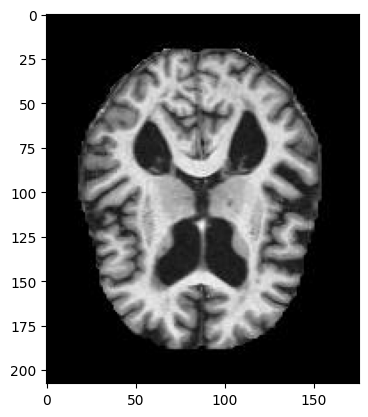

True class:	0
Predicted class:1
----------------------------


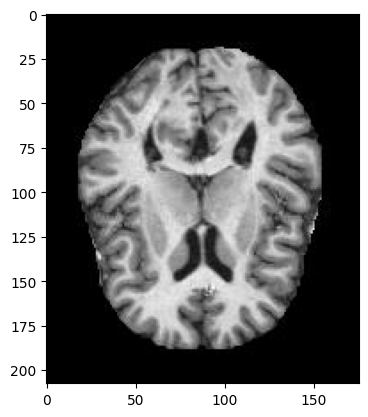

True class:	0
Predicted class:2
----------------------------


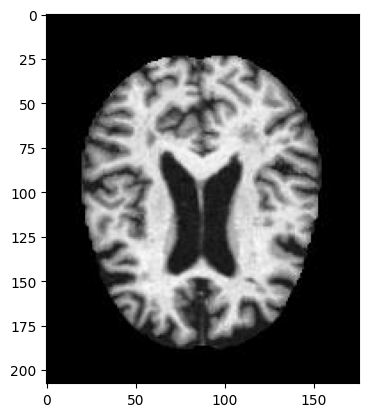

True class:	2
Predicted class:1
----------------------------


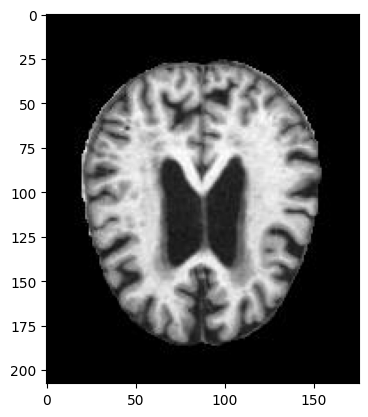

True class:	2
Predicted class:0
----------------------------


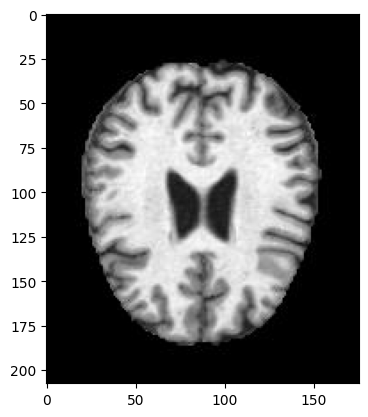

True class:	1
Predicted class:0
----------------------------


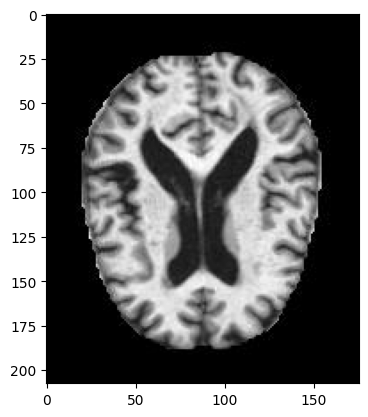

True class:	1
Predicted class:2
----------------------------


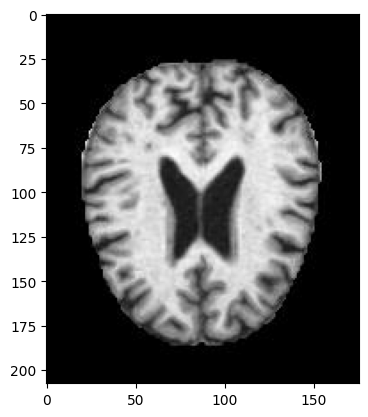

True class:	1
Predicted class:0
----------------------------


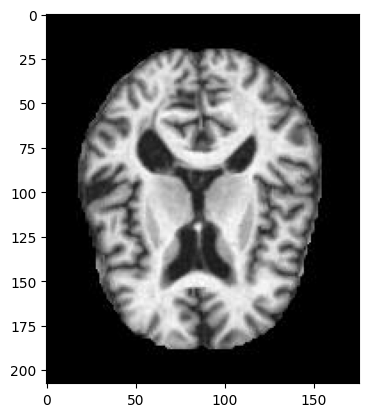

True class:	3
Predicted class:2
----------------------------


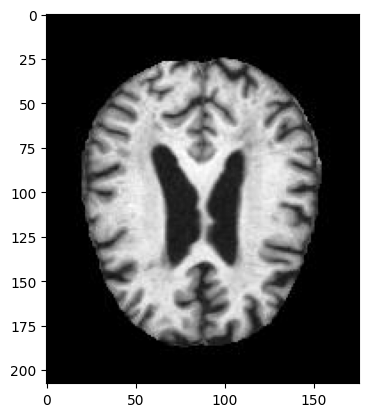

True class:	2
Predicted class:1
----------------------------


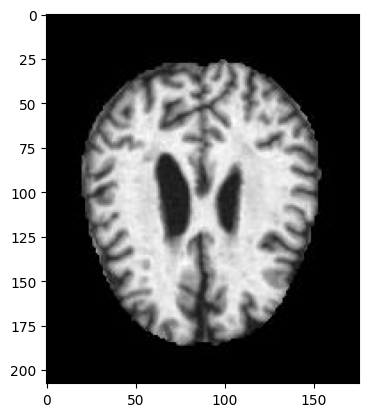

True class:	3
Predicted class:2
----------------------------


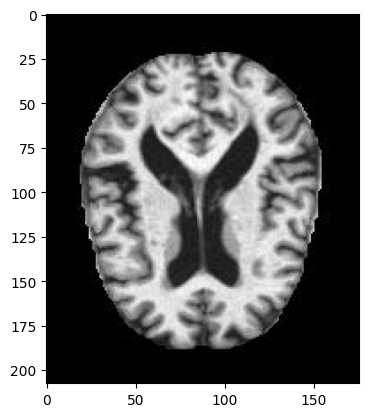

True class:	1
Predicted class:2
----------------------------


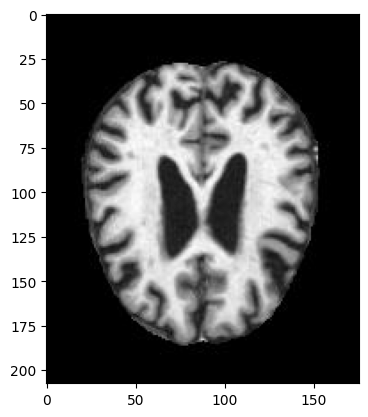

True class:	0
Predicted class:1
----------------------------


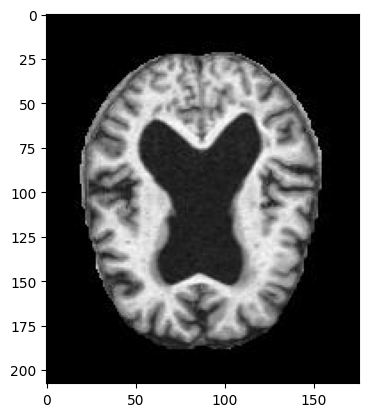

True class:	1
Predicted class:2
----------------------------


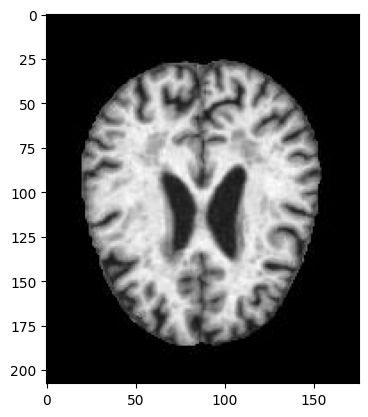

True class:	0
Predicted class:1
----------------------------


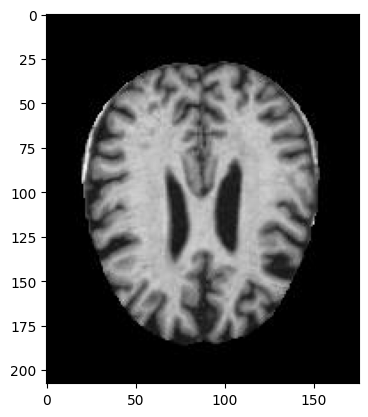

True class:	1
Predicted class:2
----------------------------


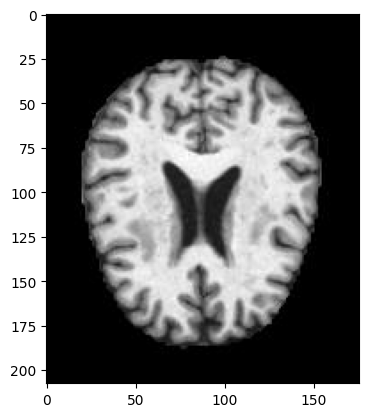

True class:	1
Predicted class:0
----------------------------


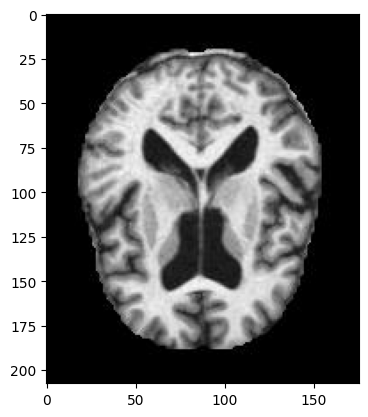

True class:	1
Predicted class:2
----------------------------


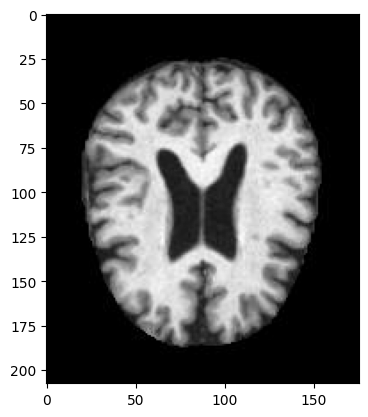

True class:	0
Predicted class:2
----------------------------


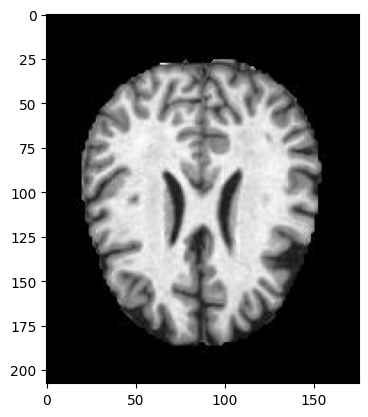

True class:	1
Predicted class:2
----------------------------


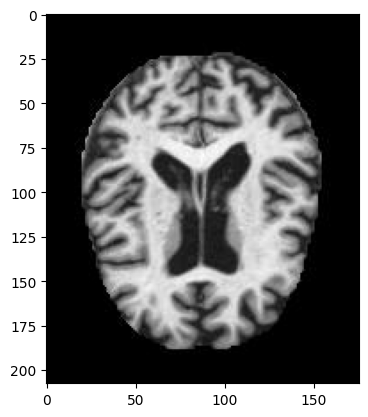

True class:	2
Predicted class:1
----------------------------


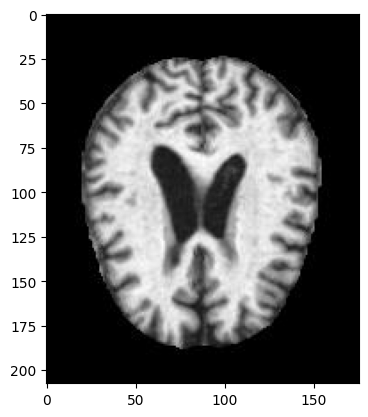

True class:	3
Predicted class:0
----------------------------


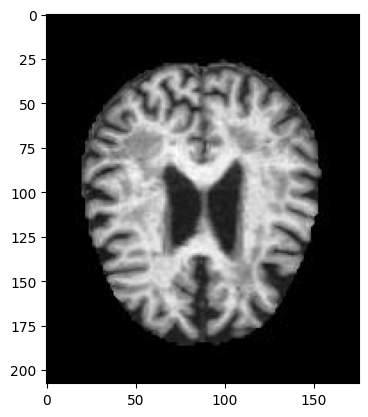

True class:	2
Predicted class:1
----------------------------


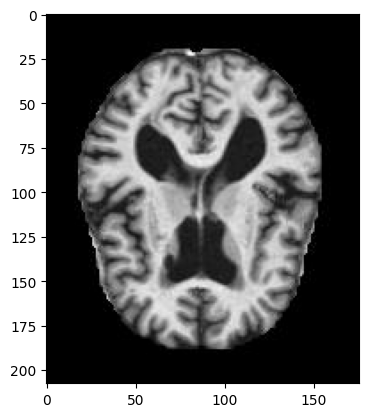

True class:	0
Predicted class:2
----------------------------


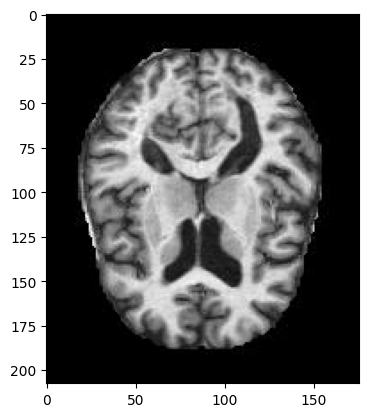

True class:	0
Predicted class:1
----------------------------


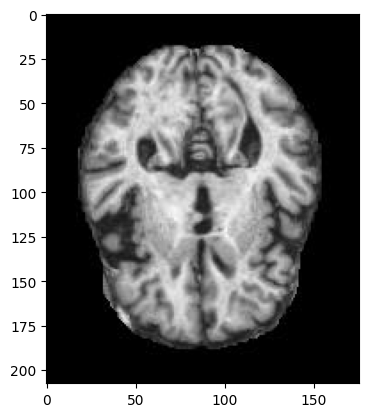

True class:	0
Predicted class:2
----------------------------


In [57]:
for wrong in misclassified:
    plt.imshow(X_test[wrong], cmap='gray', vmin=0, vmax=1)
    plt.show()
    print("True class:\t{}\nPredicted class:{}\n----------------------------".format(int(y_test[wrong]), y_predicted[wrong]))

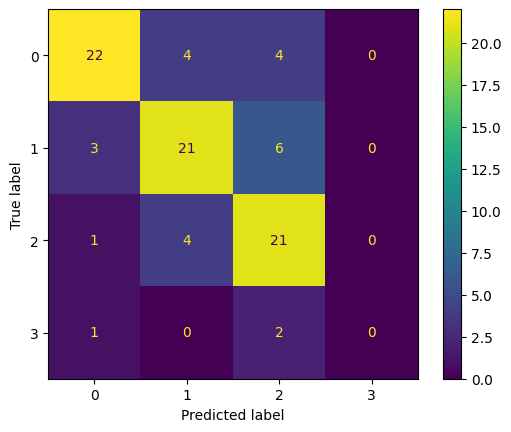

In [58]:
cm = confusion_matrix(y_test, y_predicted, labels = [0,1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1,2,3])
disp.plot()
plt.show()

In [59]:
from sklearn.metrics import f1_score, accuracy_score

f1_score(y_test, y_predicted, average = 'macro')

0.5489146595301814

In [60]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_predicted, labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.72      0.70      0.71        30
           2       0.64      0.81      0.71        26
           3       0.00      0.00      0.00         3

    accuracy                           0.72        89
   macro avg       0.54      0.56      0.55        89
weighted avg       0.70      0.72      0.71        89



/home/limbo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/limbo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/limbo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
"""
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(d2,d1,1)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=30)
"""